# Data Preprocessing

## Imports and Setup

In [1]:
import os
import sys
sys.path.insert(0, "../utils/")
import geoutils
import cnn_utils
import config

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
exp_config = '../configs/data/RGB_DOM.yaml'
c = config.load_config(exp_config, prefix='.')

## Data Preparation

In [3]:
bldgs_file = f"bldgs_drone_delices_DOM.gpkg"
bldgs_path = os.path.join(c['vectors_dir'], bldgs_file)
bldgs = gpd.read_file(bldgs_path).reset_index(drop=True)
bldgs["roof_type"] = None
bldgs["roof_material"] = None
bldgs["roof_condition"] = None
bldgs["UID"] = bldgs.index
print(f"Dimensions: {bldgs.shape}")
bldgs.head(3)

Dimensions: (544, 6)


area                                           geometry roof_type   
0  31.621052  POLYGON ((685850.029 1690506.172, 685853.771 1...      None  \
1  69.260772  POLYGON ((685814.865 1690520.076, 685813.377 1...      None   
2  77.429092  POLYGON ((685792.627 1690538.785, 685795.646 1...      None   

  roof_material roof_condition  UID  
0          None           None    0  
1          None           None    1  
2          None           None    2

In [4]:
columns = ['UID','geometry', 'roof_type', 'roof_material', 'roof_condition', 'area']
filepath = os.path.join(c['vectors_dir'],  bldgs_file)
bldgs[columns].to_file(filepath, driver='GPKG')
bldgs[columns].head(3)

UID                                           geometry roof_type   
0    0  POLYGON ((685850.029 1690506.172, 685853.771 1...      None  \
1    1  POLYGON ((685814.865 1690520.076, 685813.377 1...      None   
2    2  POLYGON ((685792.627 1690538.785, 685795.646 1...      None   

  roof_material roof_condition       area  
0          None           None  31.621052  
1          None           None  69.260772  
2          None           None  77.429092

## Inspect Data Annotations

In [19]:
exp_config = '../configs/data/RGB_DOM.yaml'
c = config.load_config(exp_config, prefix='.')
filename = os.path.join(c['csv_dir'], f"{c['config_name']}.csv")
rgb_data = pd.read_csv(filename)
rgb_data.head(3)

UID  aoi                                           filepath   
0   975.0  DOM  ./data/tiles/RGB_DOM\DOM-975-NO_ROOF-INCOMPLET...  \
1  1023.0  DOM  ./data/tiles/RGB_DOM\DOM-1023-GABLE-BLUE_TARP.tif   
2  1037.0  DOM  ./data/tiles/RGB_DOM\DOM-1037-HIP-HEALTHY_META...   

                         filename image_src roof_type  roof_material dataset  
0  DOM-975-NO_ROOF-INCOMPLETE.tif     ORTHO   NO_ROOF     INCOMPLETE   TRAIN  
1    DOM-1023-GABLE-BLUE_TARP.tif     ORTHO     GABLE      BLUE_TARP   TRAIN  
2  DOM-1037-HIP-HEALTHY_METAL.tif     ORTHO       HIP  HEALTHY_METAL   TRAIN

In [20]:
exp_config = '../configs/data/LIDAR_DOM.yaml'
c = config.load_config(exp_config, prefix='.')
filename = os.path.join(c['csv_dir'], f"{c['config_name']}.csv")
lidar_data = pd.read_csv(filename)
lidar_data.head(3)

UID  aoi                                           filepath   
0   975  DOM  ./data/tiles/LIDAR_DOM\DOM-975-NO_ROOF-INCOMPL...  \
1  1023  DOM  ./data/tiles/LIDAR_DOM\DOM-1023-GABLE-BLUE_TAR...   
2  1037  DOM  ./data/tiles/LIDAR_DOM\DOM-1037-HIP-HEALTHY_ME...   

                         filename image_src roof_type  roof_material dataset  
0  DOM-975-NO_ROOF-INCOMPLETE.tif     LIDAR   NO_ROOF     INCOMPLETE   TRAIN  
1    DOM-1023-GABLE-BLUE_TARP.tif     LIDAR     GABLE      BLUE_TARP    TEST  
2  DOM-1037-HIP-HEALTHY_METAL.tif     LIDAR       HIP  HEALTHY_METAL   TRAIN

## Inspect Image Crops

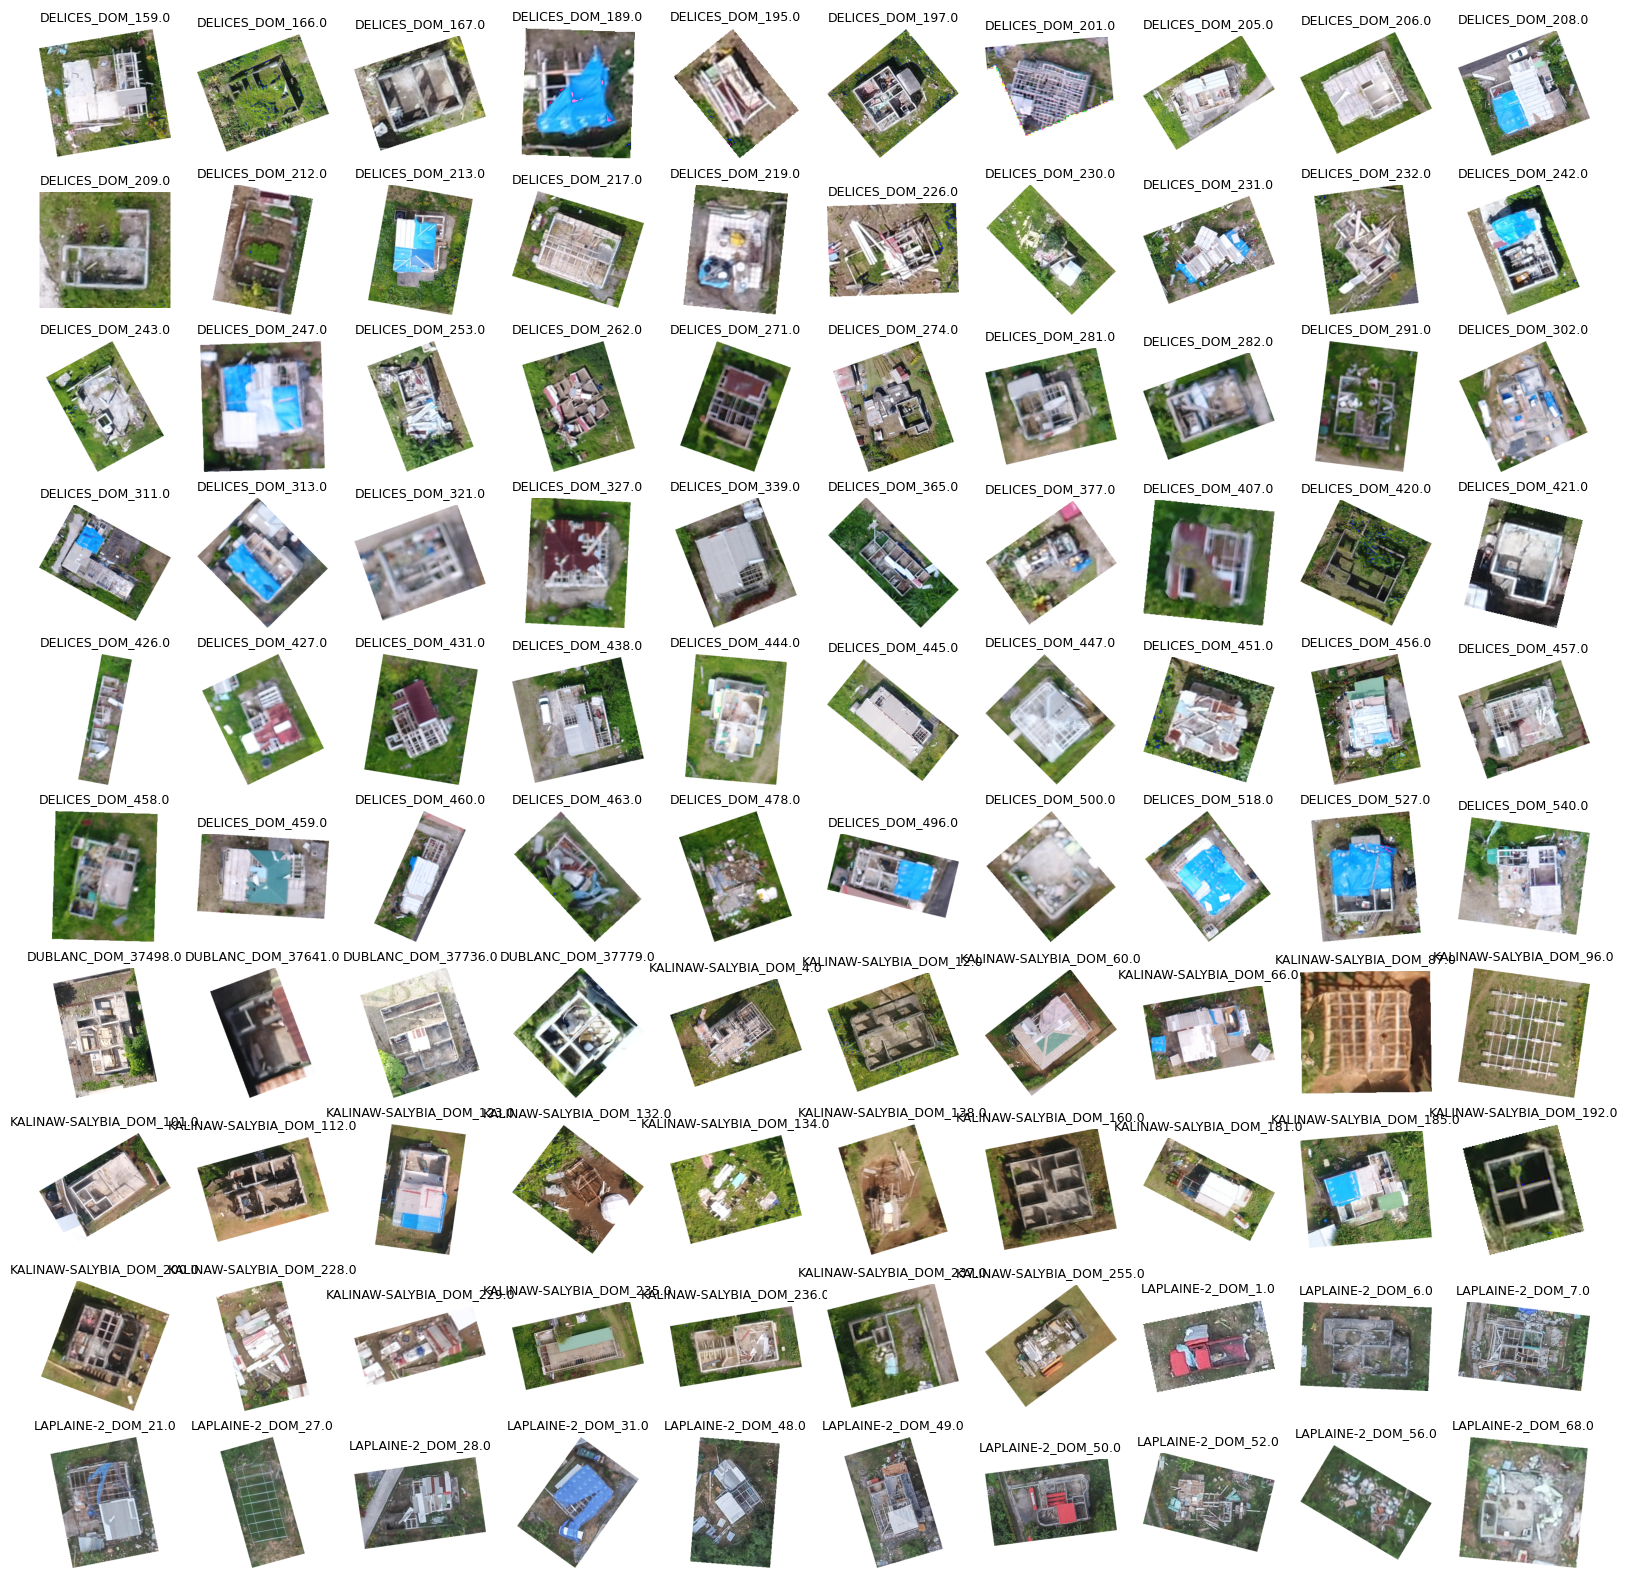

In [55]:
geoutils.inspect_image_crops(
    rgb_data[rgb_data.aoi != 'DOM'],
    lidar_data=lidar_data,
    column='roof_material', 
    value='INCOMPLETE',
    index=50, 
    n_rows=5,
    n_cols=10,
    figsize=(20,20),
    prefix='.'
)

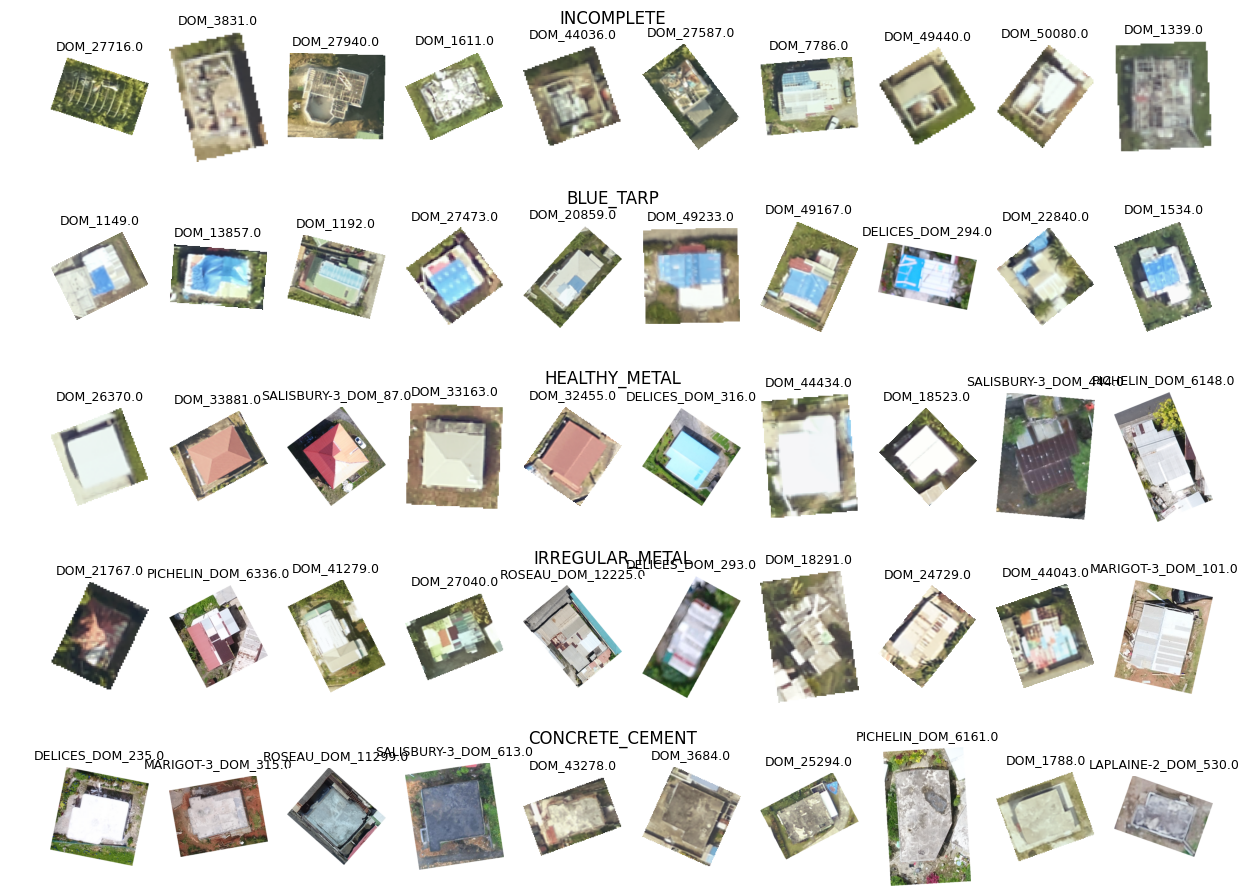

In [54]:
n_samples = 10
geoutils.visualize_image_crops(
    rgb_data, 
    'roof_material', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,9),
    prefix='.'
)

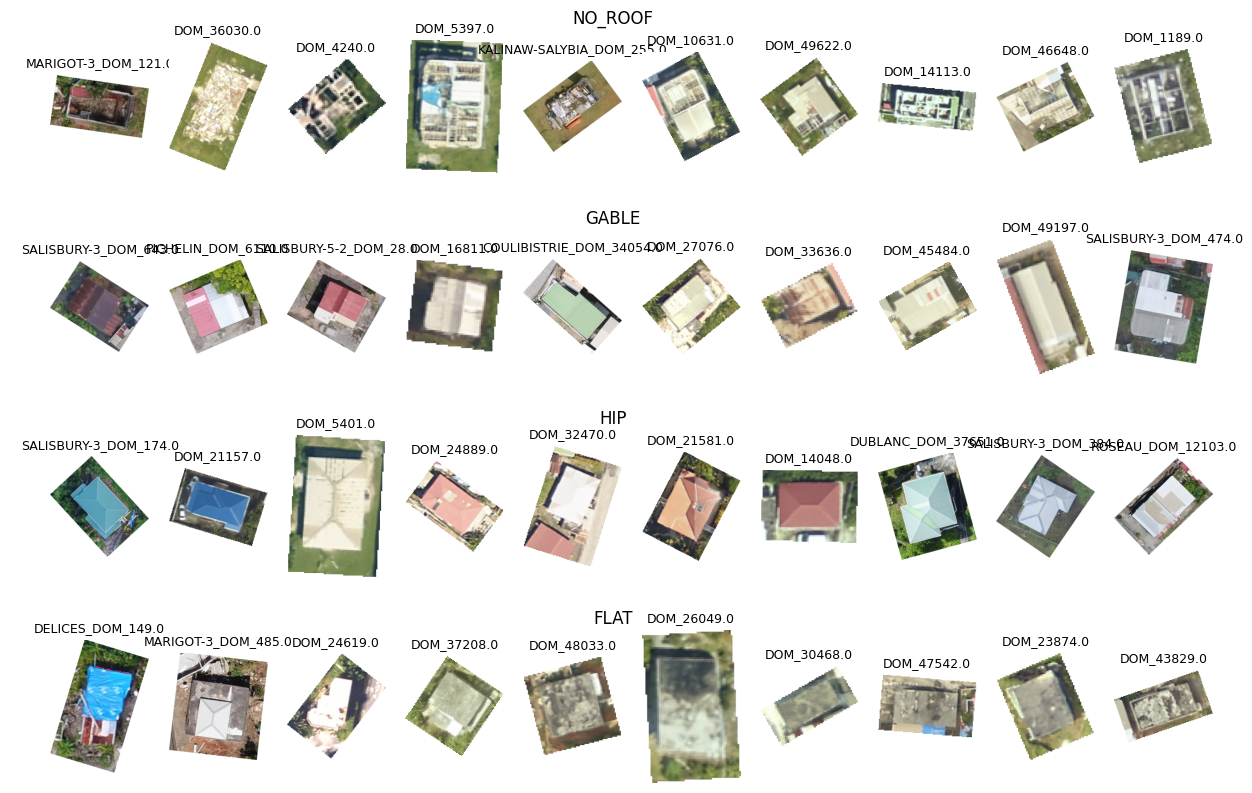

In [57]:
geoutils.visualize_image_crops(
    rgb_data, 
    'roof_type', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,8),
    prefix='.'
)

C:\Users\Issa\Documents\Projects\GFDRR\caribbean-rooftop-classification\notebooks\../utils\geoutils.py:47: RuntimeWarning: overflow encountered in multiply
  image = image.read([1]) * 255


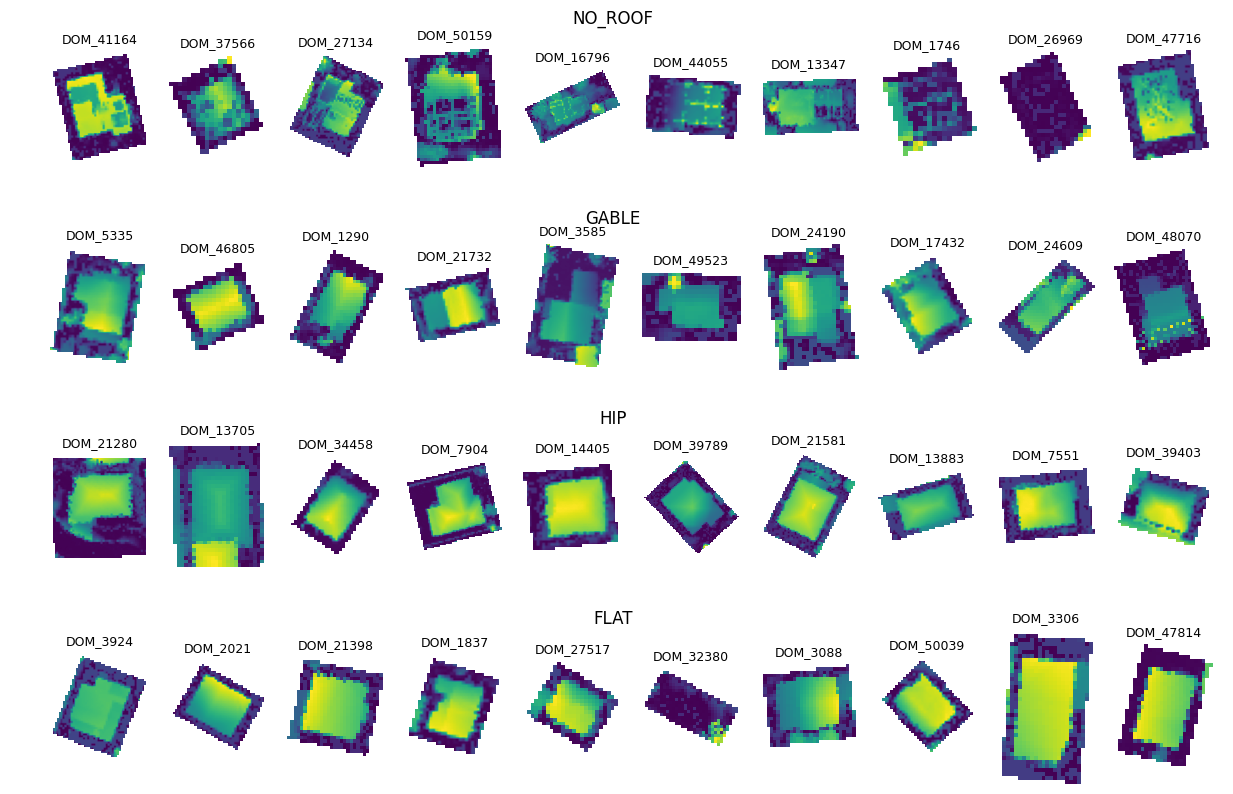

In [58]:
geoutils.visualize_image_crops(
    lidar_data, 
    'roof_type', 
    n_samples=10, 
    n_channels=1, 
    figsize=(15,8),
    prefix='.'
)